# Business Understanding

## Project Domain

Project ini fokus utamanya yaitu untuk memprediksi kondisi kesehatan janin berdasarkan data medis yang telah dikumpulkan selama kehamilan. Dengan kemajuan teknologi dan tersedianya data medis seperti detak jantung janin dan hasil rekaman CTG (Cardiotocography).

## Problem Statements

Data medis seperti CTG masih sangat bergantung pada pengalaman subjektif tenaga medis. Hal ini berpotensi menimbulkan kesalahan diagnosis atau keterlambatana dalam tindakan medis.

## Goals

Tujuan :


1.   Membangun model ANN untuk mengklasifikasikan kondisi kesehatan janin menjadi Normal, Dicurigai, dan Beresiko.
2.   Memberi bantuan mengambil keputusan yang cepat dan akurat kepada tenaga medis.
3. Memberikan pengetauan medis tentang fitur-fitur apa saja yang paling berpengaruh terhadap prediksi kondisi janin.


## Solution Statements



*  Melakukan eksplorasi dan pembersihan data dari dataset.
*   Perancangan dan pelatihan model klasifikasi menggunakan pendekatan ANN.
* Evaluasi performa model menggunakan metrik akurasi.


# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ripaajengdestapia","key":"abe5ee2bf1bbfd26844ca8616de171d3"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d andrewmvd/fetal-health-classification

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification
License(s): other
  0% 0.00/45.8k [00:00<?, ?B/s]
100% 45.8k/45.8k [00:00<00:00, 125MB/s]


In [4]:
!mkdir fetal-health-classification
!unzip fetal-health-classification.zip -d fetal-health-classification
!ls fetal-health-classification

Archive:  fetal-health-classification.zip
  inflating: fetal-health-classification/fetal_health.csv  
fetal_health.csv


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [6]:
df = pd.read_csv('fetal-health-classification/fetal_health.csv')

In [7]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

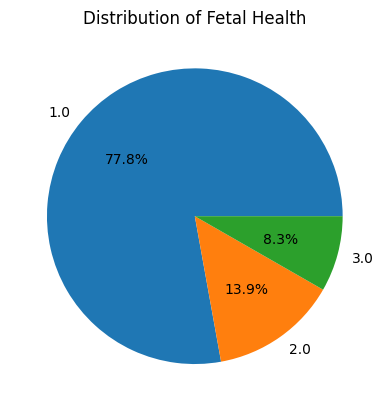

In [9]:
#Pie Chartnya
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame (as defined in the previous code)
df['fetal_health'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Fetal Health')
plt.ylabel('')  # Hide the y-label
plt.show()

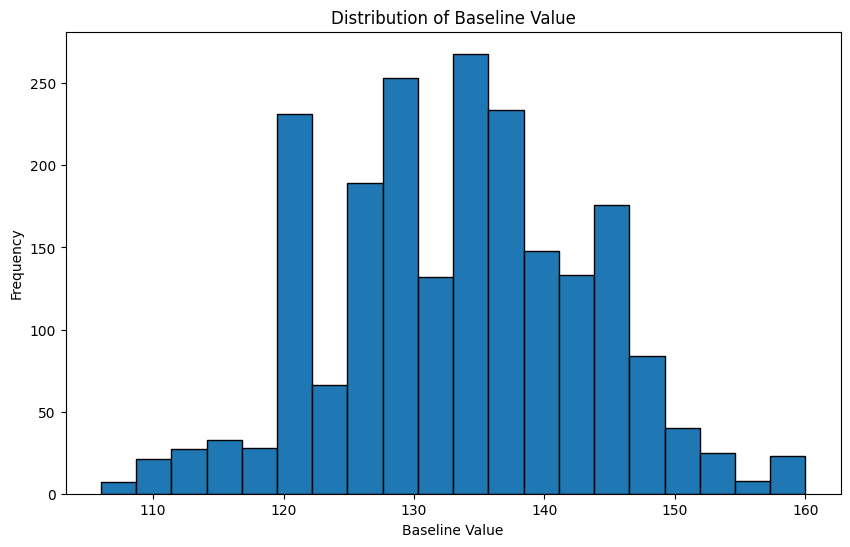

In [10]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['baseline value'], bins=20, edgecolor='black')
plt.xlabel('Baseline Value')
plt.ylabel('Frequency')
plt.title('Distribution of Baseline Value')
plt.show()

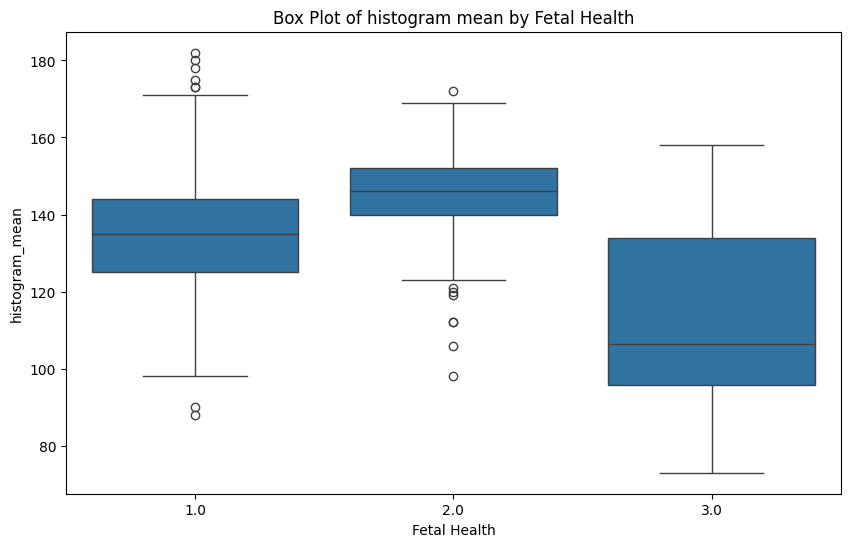

In [11]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='fetal_health', y='histogram_mean', data=df)
plt.xlabel('Fetal Health')
plt.ylabel('histogram_mean')
plt.title('Box Plot of histogram mean by Fetal Health')
plt.show()

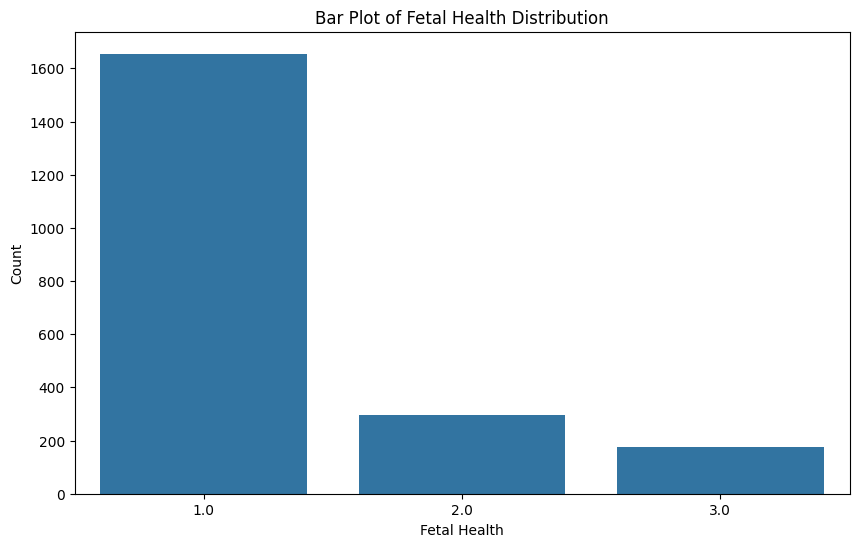

In [12]:
# Assuming 'df' is your DataFrame (as defined in the previous code)
plt.figure(figsize=(10, 6))
sns.countplot(x='fetal_health', data=df)
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.title('Bar Plot of Fetal Health Distribution')
plt.show()


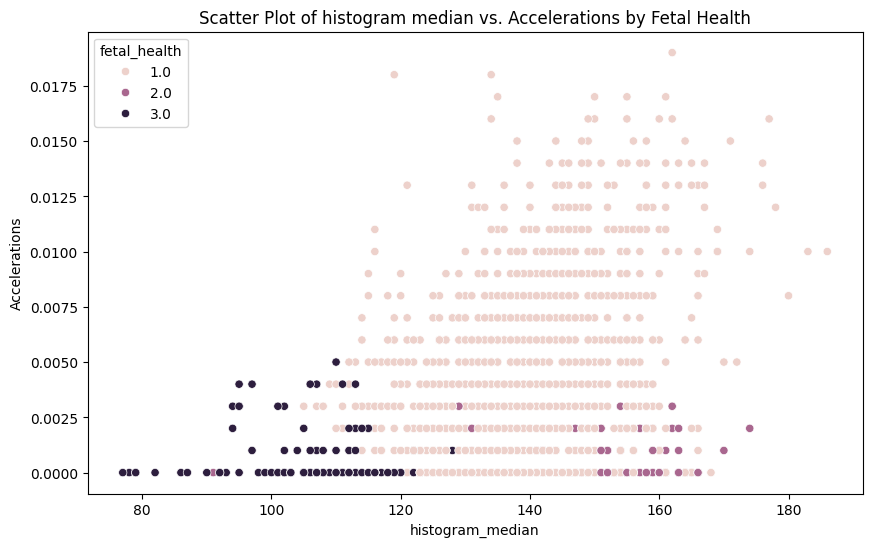

In [13]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='histogram_median', y='accelerations', hue='fetal_health', data=df)
plt.xlabel('histogram_median')
plt.ylabel('Accelerations')
plt.title('Scatter Plot of histogram median vs. Accelerations by Fetal Health')
plt.show()


# Data Preparation

In [14]:
# pisahkan fitur dan target
X = df.drop('fetal_health', axis=1)  # Features
y = df['fetal_health']

In [15]:
# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [16]:
# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

In [18]:
pd.DataFrame(X_scaled, columns=X.columns).head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,0.259259,0.000000,0.0,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,...,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0
1,0.481481,0.315789,0.0,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,...,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5
2,0.500000,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,...,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5
3,0.518519,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,...,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0
4,0.481481,0.368421,0.0,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,...,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0


# Modeling

In [19]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

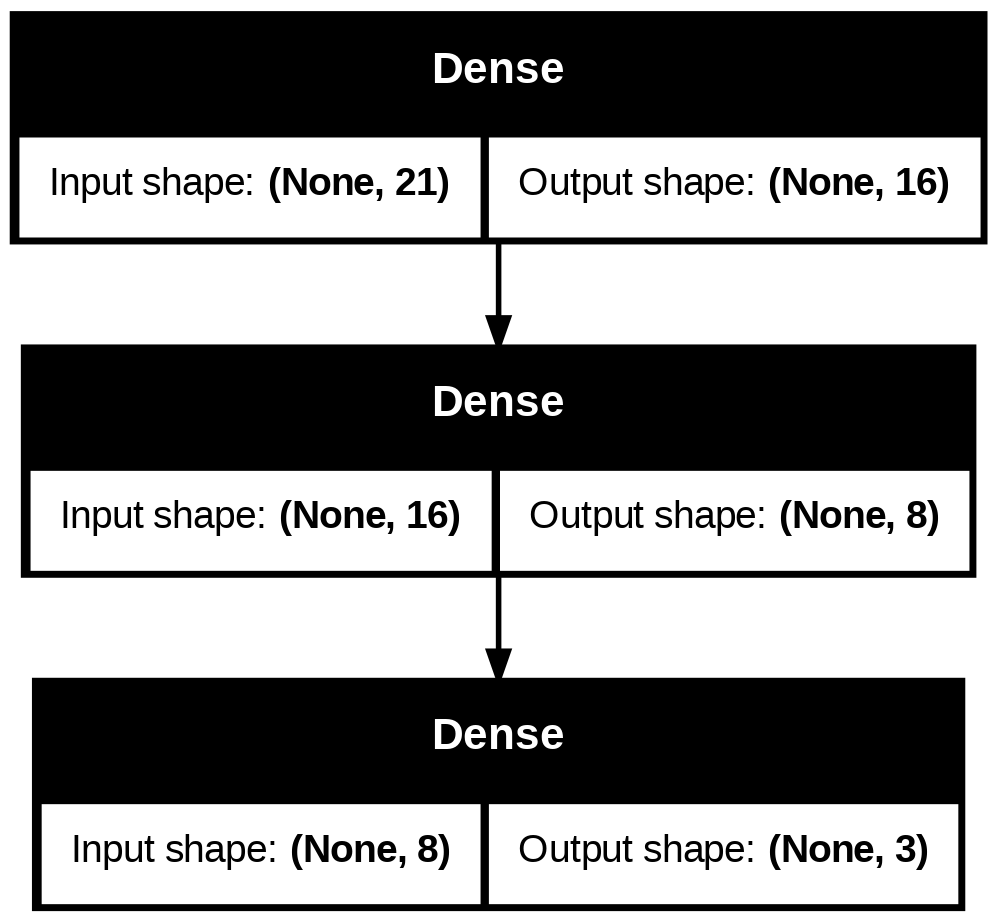

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [22]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2502 - loss: 1.1371 - val_accuracy: 0.8088 - val_loss: 0.6887
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7744 - loss: 0.6611 - val_accuracy: 0.8059 - val_loss: 0.5252
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7628 - loss: 0.5885 - val_accuracy: 0.8176 - val_loss: 0.4715
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7886 - loss: 0.5227 - val_accuracy: 0.8265 - val_loss: 0.4414
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8166 - loss: 0.4709 - val_accuracy: 0.8265 - val_loss: 0.4132
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7922 - loss: 0.4951 - val_accuracy: 0.8324 - val_loss: 0.3891
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8140 - loss: 0.4583 - val_accuracy: 0.8412 - val_loss: 0.3722
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8023 - loss: 0.4324 - val_accuracy: 0.8412 - 

# Evaluation

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9073 - loss: 0.2400 
Test accuracy: 89.44%


In [24]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

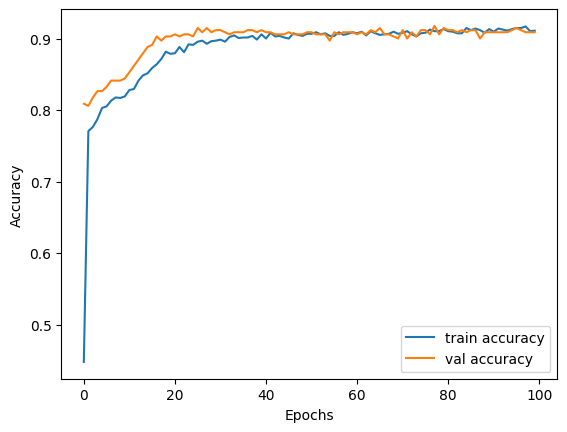

In [25]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

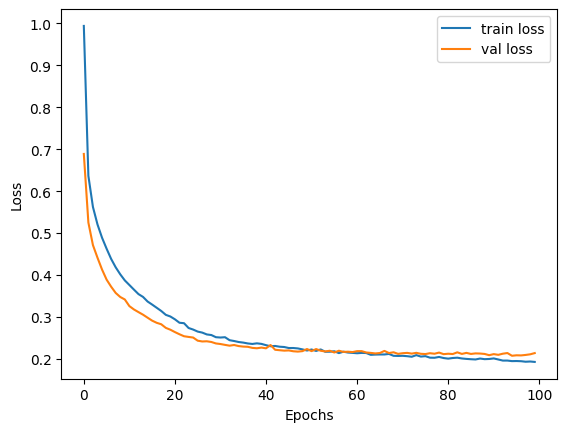

In [26]:
# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


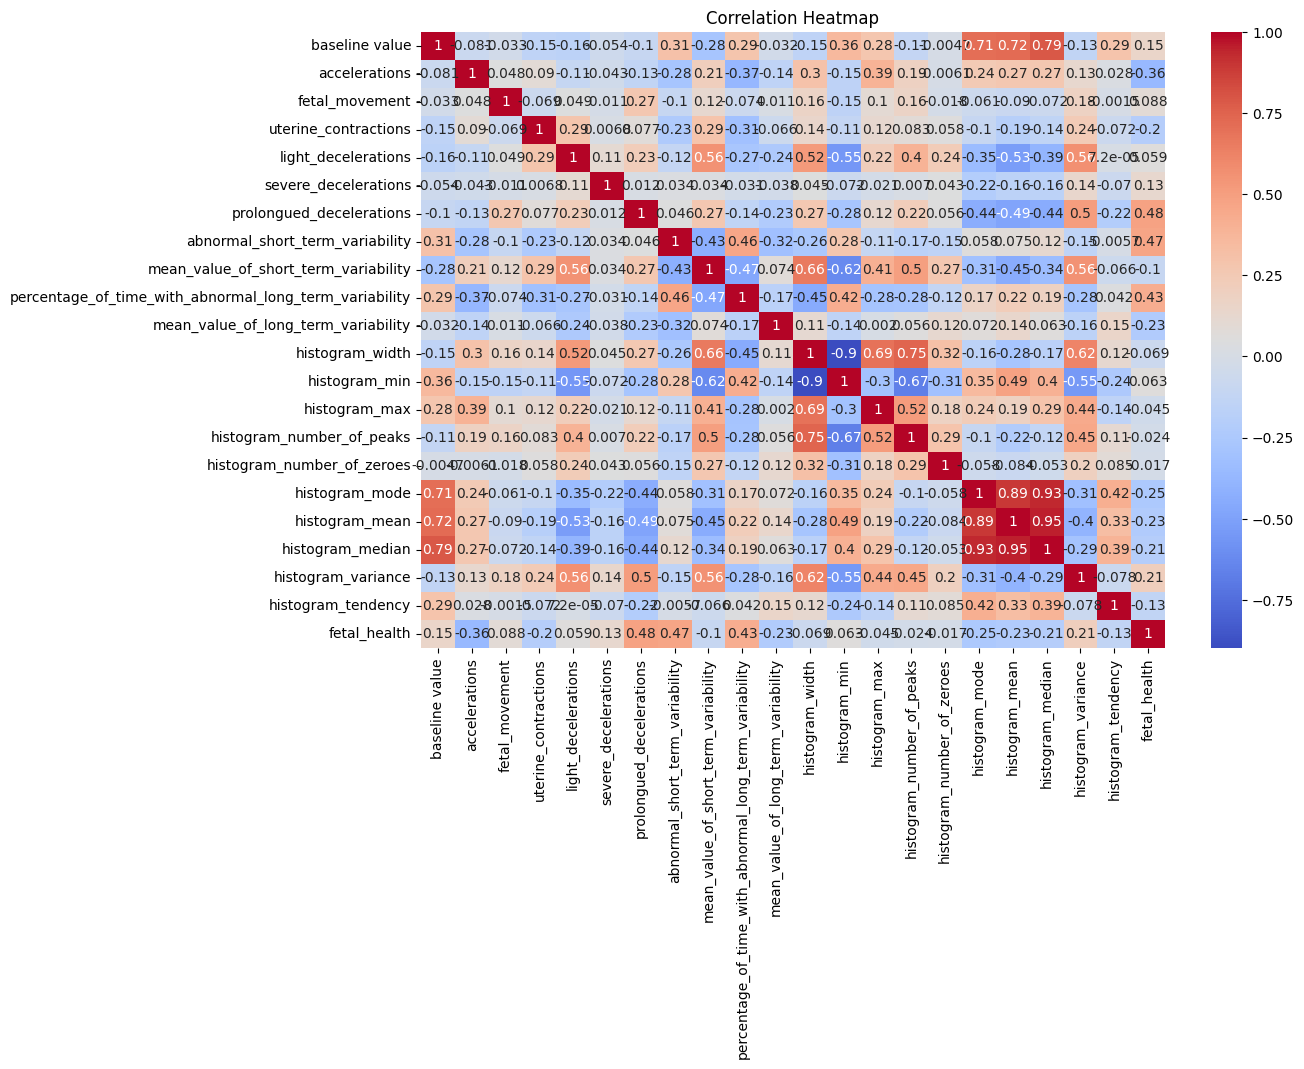

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       333
           1       0.69      0.67      0.68        64
           2       0.85      0.76      0.80        29

    accuracy                           0.89       426
   macro avg       0.82      0.79      0.81       426
weighted avg       0.89      0.89      0.89       426



In [27]:
# Assuming your dataframe is named df
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [28]:
sample_input = np.array([[0.48, 0.36, 0.0, 0.53, 0.0, 0.0, 0.0, 0.05, 0.32, 0.00, 0.64, 0.02, 0.41, 0.50, 0.0, 0.60, 0.57, 0.55, 0.04, 1.0]])
sample_input = np.insert(sample_input, -1, 0, axis=1)

sample_input_df = pd.DataFrame(sample_input)
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [29]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_crop = le.inverse_transform([predicted_class])
recommended_fetal_health = predicted_crop[0]  # Assign the predicted value
print(f"Yang direkomendasikan: Kondisi janin kategori {recommended_fetal_health}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Yang direkomendasikan: Kondisi janin kategori 1.0


## Save Model

In [30]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('fetal_health_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp0zl7niq_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133262121669008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133262121670544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133262121673232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133262121669968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133262121674192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133262121674384: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [31]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']